In [31]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit, fsolve
from matplotlib import pyplot as plt

## fitting a curve

In [19]:
def func(x,a,b):
    return a*x+b

def func_gauss(x,a,mu, sig):
    return a * np.exp(-(x-mu)**2 /(2*sig**2))

def func_gauss2(x, a0, mu0, sig0, a1, mu1, sig1):
    return a0 * np.exp(-(x-mu0)**2 /(2*sig0**2)) + a1 * np.exp(-(x-mu1)**2 /(2*sig1**2))

In [3]:
x = np.linspace(0,10,100)
y = func(x,1,2)
yn = y + 0.8 * np.random.normal(size=100)

popt, pcov = curve_fit(func, x, yn)

popt

array([0.9910866 , 2.16486525])

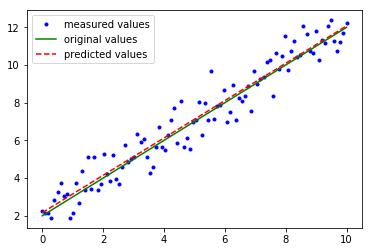

In [7]:
plt.plot(x,yn,'.b', label='measured values')
plt.plot(x,y,'-g', label='original values')
plt.plot(x, popt[0]*x + popt[1], '--r', label='predicted values')
plt.legend()

In [16]:
x = np.linspace(0,10,100)
y = func_gauss(x,1,5,2)
yn = y + 0.2 * np.random.normal(size=100)

popt, pcov = curve_fit(func_gauss, x,yn)
popt

array([ 0.96845667,  4.99731249, -1.86040425])

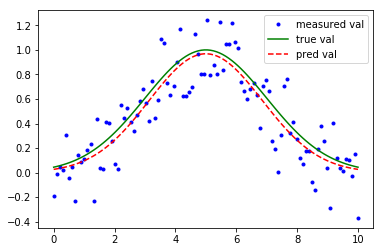

In [18]:
plt.plot(x,yn, '.b', label='measured val')
plt.plot(x,y, '-g', label='true val')
plt.plot(x,func_gauss(x, popt[0], popt[1], popt[2]), '--r', label='pred val')
plt.legend()

In [29]:
x = np.linspace(0,10,100)
y = func_gauss2(x, 1,3,2,-2,2,1)
yn = y + 0.25 * np.random.normal(size=100)

gusses = [0.8,3.2,1.9,-3.5,3,1.5]

popt, pcov = curve_fit(func_gauss2,x, yn, p0=gusses)
popt

array([ 0.67108986,  3.91340122,  1.64693876, -1.50934626,  2.09407369,
        0.83390092])

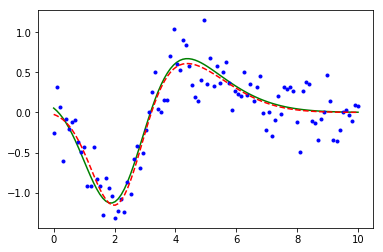

In [30]:
plt.plot(x,y,'-g', label='true val')
plt.plot(x,yn,'.b', label='measured val')
plt.plot(x,func_gauss2(x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]),'--r', label='pred val')

## Root of function

In [33]:
line = lambda x: x+3

solution = fsolve(line, -2)
solution

array([-3.])

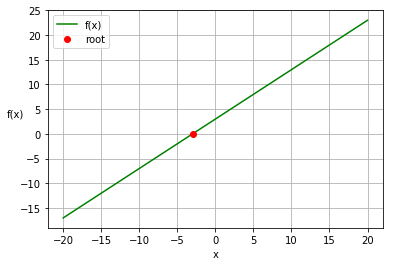

In [44]:
x = np.linspace(-20,20,100)
plt.plot(x, line(x), '-g', label='f(x)')
plt.plot(solution, [0], 'or', label='root')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0)
plt.grid()